# Text cleaning with BeautifulSoup

Our  first step should be manually checking the input data. This is pretty critical; with text data, one needs to try and understand what issues exist in the data initially so as to identify the cleaning needed.
It's kind of painful to read through a dataset full of hateful Internet commentary, so here's an example entry:
We have an ID field and date field which don't seem to need much work. The
text fields, however, are quite challenging. From this one case, we can already see misspelling and HTML inclusion. Furthermore, many entries in the dataset contain attempts to bypass swear filtering, usually by including a space or punctuation element mid-word. Other data quality issues include multiple vowels (to extend a word), non-ascii characters, hyperlinks... the list goes on. 
BeautifulSoup is a very powerful html parsing library which can, among other things, remove HTML markup. Let's take a look at this library in action on our troll data:

In [20]:
from bs4 import BeautifulSoup
#import pandas as pd
import re
import csv

#we're going to load in our test and training data 
#test = pd.read_csv('testtrolls.csv', header=True, names=['y', 'date', 'Comment'])
#training = pd.read_csv('trainingtrolls.csv', header=True, names=['y', 'date', 'Comment', 'Usage'])

trolls = []
with open('trainingtrolls.csv',  'rt') as f:
    reader = csv.DictReader(f)
    for line in reader:
        
        line = BeautifulSoup(str(line["Comment"]), "html.parser")  
        trolls.append(line)

# Managing punctuation and tokenizing

Tokenisation is the process of creating a set of tokens from a stream of text. Many tokens are words, while others might be character sets (such as smilies or other punctuation strings, for example, ????????). 

Now that we've removed a lot of the HTML ugliness from our initial dataset, we can take steps to further improve the cleanliness of our text data. To do this, we'll leverage the "re" module, which allows us to use operations over regular expressions, such as substring replacement.

We'll perform a series of operations over our input text on this pass, which mostly focus on replacing variable or problematic text elements with tokens. Let's begin with a simple example, replacing e-mail addresses with an _EM token:

## Lets apply cleaning on one line

In [21]:
#line = trolls[0]
#line = """\xa0@Flip\xa0how are you not ded"""
line = "GALLUP DAILY\nMay 24-26, 2012 \u2013 Updates daily at 1 p.m. ET; reflects one-day change\nNo updates Monday, May 28; next update will be Tuesday, May 29.\nObama Approval48%-\nObama Disapproval45%-1\nPRESIDENTIAL ELECTION\nObama47%-\nRomney45%-\n7-day rolling average\n\n It seems the bump Romney got is over and the president is on his game."
print(line)

GALLUP DAILY
May 24-26, 2012 – Updates daily at 1 p.m. ET; reflects one-day change
No updates Monday, May 28; next update will be Tuesday, May 29.
Obama Approval48%-
Obama Disapproval45%-1
PRESIDENTIAL ELECTION
Obama47%-
Romney45%-
7-day rolling average

 It seems the bump Romney got is over and the president is on his game.


Replacing e-mail addresses with an _EM token:

In [22]:
line = re.sub(r'[\w\-][\w\-\.]+@[\w\-][\w\-\.]+[a-zA-Z]{1,4}', '_EM', str(line))
print(line)

GALLUP DAILY
May 24-26, 2012 – Updates daily at 1 p.m. ET; reflects one-day change
No updates Monday, May 28; next update will be Tuesday, May 29.
Obama Approval48%-
Obama Disapproval45%-1
PRESIDENTIAL ELECTION
Obama47%-
Romney45%-
7-day rolling average

 It seems the bump Romney got is over and the president is on his game.


Replacing e-mail addresses with an _EM token:

In [23]:
line = re.sub(r'[\w\-][\w\-\.]+@[\w\-][\w\-\.]+[a-zA-Z]{1,4}', '_EM', str(line))
print(line)

GALLUP DAILY
May 24-26, 2012 – Updates daily at 1 p.m. ET; reflects one-day change
No updates Monday, May 28; next update will be Tuesday, May 29.
Obama Approval48%-
Obama Disapproval45%-1
PRESIDENTIAL ELECTION
Obama47%-
Romney45%-
7-day rolling average

 It seems the bump Romney got is over and the president is on his game.


 Similarly, we can remove URLs, replacing them with the _U token:

In [24]:
line = re.sub(r'\w+:\/\/\S+', r'_U', line)
print(line)

GALLUP DAILY
May 24-26, 2012 – Updates daily at 1 p.m. ET; reflects one-day change
No updates Monday, May 28; next update will be Tuesday, May 29.
Obama Approval48%-
Obama Disapproval45%-1
PRESIDENTIAL ELECTION
Obama47%-
Romney45%-
7-day rolling average

 It seems the bump Romney got is over and the president is on his game.


Remove extra or problematic whitespace and newline characters, hyphens, and underscores. In addition, we'll begin managing the problem of multiple characters, often used for emphasis in informal conversation.

In [25]:
line = line.replace('"', ' ')
line = line.replace('\'', ' ')
line = line.replace('_', ' ')
line = line.replace('-', ' ')
line = line.replace('\n', ' ')
line = line.replace('\\n', ' ')
line = line.replace('\'', ' ')
line = re.sub(' +',' ', line)
line = line.replace('\'', ' ')
print(line)

GALLUP DAILY May 24 26, 2012 – Updates daily at 1 p.m. ET; reflects one day change No updates Monday, May 28; next update will be Tuesday, May 29. Obama Approval48% Obama Disapproval45% 1 PRESIDENTIAL ELECTION Obama47% Romney45% 7 day rolling average It seems the bump Romney got is over and the president is on his game.


Kill off any punctuation issues, employing tags (such as _Q, _X) where we feel the punctuation might lead to useful features.

Extended series of punctuation characters are encoded here using codes such as _BQ and BX; these longer tags are used as a means of differentiating from the more straightforward _Q and _X tags (which refer to the use of a question mark and exclamation mark, respectively).

In [26]:
line = re.sub(r'([^!\?])(\?{2,})(\Z|[^!\?])', r'\1 _BQ\n\3', line)
line = re.sub(r'([^\.])(\.{2,})', r'\1 _SS\n', line)
line = re.sub(r'([^!\?])(\?|!){2,}(\Z|[^!\?])', r'\1 _BX\n\3', line)
line = re.sub(r'([^!\?])\?(\Z|[^!\?])', r'\1 _Q\n\2', line)
line = re.sub(r'([^!\?])!(\Z|[^!\?])', r'\1 _X\n\2', line)
line = re.sub(r'([a-zA-Z])\1\1+(\w*)', r'\1\1\2 _EL', line)
line = re.sub(r'([a-zA-Z])\1\1+(\w*)', r'\1\1\2 _EL', line)
line = re.sub(r'(\w+)\.(\w+)', r'\1\2', line)
print(line)

GALLUP DAILY May 24 26, 2012 – Updates daily at 1 pm. ET; reflects one day change No updates Monday, May 28; next update will be Tuesday, May 29. Obama Approval48% Obama Disapproval45% 1 PRESIDENTIAL ELECTION Obama47% Romney45% 7 day rolling average It seems the bump Romney got is over and the president is on his game.


Next, we want to begin creating other tokens of interest. One of the more helpful indicators available is the _SW token for swearing. We'll also use regular expressions to help identify and tokenize smileys into one of four buckets; big and happy smileys (_BS), small and happy ones (_S), big and sad ones (_BF), and small and sad ones (_F):


In [27]:
#Swears
line = re.sub(r'([#%&\*\$]{2,})(\w*)', r'\1\2 _SW', line)
line = re.sub('[1|2|3|4|5|6|7|8|9|0]', '', line)
# big and happy smileys       
line = re.sub(r' [8x;:=]-?(?:\)|\}|\]|>){2,}', r' _BS', line)
# small and happy smileys       
line = re.sub(r' (?:[;:=]-?[\)\}\]d>])|(?:<3)', r' _S', line)
#big and sad smileys
line = re.sub(r' [x:=]-?(?:\(|\[|\||\\|/|\{|<){2,}', r' _BF', line)
#small and sad
line = re.sub(r' [x:=]-?[\(\[\|\\/\{<]', r' _F', line)
line = re.sub('[%]', '', line)
print(line)

GALLUP DAILY May  ,  – Updates daily at  pm. ET; reflects one day change No updates Monday, May ; next update will be Tuesday, May . Obama Approval Obama Disapproval  PRESIDENTIAL ELECTION Obama Romney  day rolling average It seems the bump Romney got is over and the president is on his game.


 Now we're starting to split the comment into individual 1-word phrases, as an ['foo', 'bar', 'baz'] array instead of "foo bar baz"

In [28]:
phrases = re.split(r'[;:\.()\n]', line)
phrases = [re.findall(r'[\w%\*&#]+', ph) for ph in phrases]
phrases = [ph for ph in phrases if ph]

words = []
        
for ph in phrases:
    words.extend(ph)
print(words)

['GALLUP', 'DAILY', 'May', 'Updates', 'daily', 'at', 'pm', 'ET', 'reflects', 'one', 'day', 'change', 'No', 'updates', 'Monday', 'May', 'next', 'update', 'will', 'be', 'Tuesday', 'May', 'Obama', 'Approval', 'Obama', 'Disapproval', 'PRESIDENTIAL', 'ELECTION', 'Obama', 'Romney', 'day', 'rolling', 'average', 'It', 'seems', 'the', 'bump', 'Romney', 'got', 'is', 'over', 'and', 'the', 'president', 'is', 'on', 'his', 'game']


Next, we perform a search for single-letter sequences. Sometimes, for emphasis, Internet communication involves the use of spaced single-letter chains. This may be attempted as a method of avoiding curse word detection:

In [29]:
tmp = words
words = []
new_word = ''
for word in tmp:
    if len(word) == 1:
        new_word = new_word + word
    else:
        if new_word:
            words.append(new_word)
            new_word = ''
        words.append(word)
print(words)

['GALLUP', 'DAILY', 'May', 'Updates', 'daily', 'at', 'pm', 'ET', 'reflects', 'one', 'day', 'change', 'No', 'updates', 'Monday', 'May', 'next', 'update', 'will', 'be', 'Tuesday', 'May', 'Obama', 'Approval', 'Obama', 'Disapproval', 'PRESIDENTIAL', 'ELECTION', 'Obama', 'Romney', 'day', 'rolling', 'average', 'It', 'seems', 'the', 'bump', 'Romney', 'got', 'is', 'over', 'and', 'the', 'president', 'is', 'on', 'his', 'game']


However, there are two significant problems still obvious in both examples. In
the first case, we have a misspelled word; we need to  find a way to eliminate this. Secondly, a lot of the words in both examples (for example. are, pm) aren't terribly informative in and of themselves. The problem we  find, particularly for shorter text samples, is that what's left after cleaning may contain only one or two meaningful terms. If these terms are not terribly common in the corpus as a whole, it can prove to be very difficult to train a classifier to recognise these terms' significance.

# Tagging and categorising words

English language words come in several types—nouns, verbs, adverbs, and so on. 
These are commonly referred to as parts of speech (POS). If we know that a certain word is an adjective, as opposed to a verb or stop word (such as a, the, or of), we can treat it differently or more importantly, our algorithm can!
If we can perform part of speech tagging by identifying and encoding word classes as categorical variables, we're able to improve the quality of our data by retaining only the valuable content. 
We'll look at a subset of the applicable tagging techniques. 
Specifically, we'll focus on using the function pos_tag from the nltk library. The method tags words according to Penn treebank corpus. 
You can find the tags used in this method at this link:
https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
You can find more details about pos_tag here:
https://www.nltk.org/book/ch05.html


## Filtering stop words


Why eliminate stop words?, it tends to be true that stop words add little to nothing to most text analysis and can be responsible for a degree of noise and training variance. 
We can find the list of englisg stop words here:
https://www.ranks.nl/stopwords

Fortunately,  filtering stop words is pretty straightforward. 
We'll simply import NLTK, download and import the dictionaries, then perform a scan over all words in our pre-existing word vector, removing any stop words found:

In [30]:
import nltk
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
print(words)



['GALLUP', 'DAILY', 'May', 'Updates', 'daily', 'pm', 'ET', 'reflects', 'one', 'day', 'change', 'No', 'updates', 'Monday', 'May', 'next', 'update', 'Tuesday', 'May', 'Obama', 'Approval', 'Obama', 'Disapproval', 'PRESIDENTIAL', 'ELECTION', 'Obama', 'Romney', 'day', 'rolling', 'average', 'It', 'seems', 'bump', 'Romney', 'got', 'president', 'game']


## Tagging with NLTK

Tagging is the process of identifying parts of speech, as we described previously, and applying tags to each term.
However, even brief consideration will make it obvious that our use of language is a lot more complicated than this allows. We may use a word (such as ferry) as one of several parts of speech and it may not be straightforward to decide how to treat each word in every utterance. A lot of the time, the correct tag can only be understood contextually given the other words and their positioning within the phrase.


In [32]:
from nltk import pos_tag
from nltk.corpus import wordnet
tagged = []
#nltk.download('averaged_perceptron_tagger')     
#nltk.download('wordnet')
for t in words:
    t = t.lower()
    treebank_tag = pos_tag([t])
    tagged.append(treebank_tag)
print(tagged)

 #this function just translates between the PoS tags used by our Treebank tagger and the WordNet equivalents.     
#As it was trained with the Treebank corpus, it also uses the Treebank tag set.

    
def get_wordnet_pos(treebank_tag):

    if treebank_tag[0][1].startswith('J'):
        return wordnet.ADJ
    elif treebank_tag[0][1].startswith('V'):
        return wordnet.VERB
    elif treebank_tag[0][1].startswith('N'):
        return wordnet.NOUN
    elif treebank_tag[0][1].startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
postagged = []
for t in tagged:
    newtag = t[0][0],get_wordnet_pos(t)
   # print(get_wordnet_pos(t))
    postagged.append(newtag)
print(postagged)     

[[('gallup', 'NN')], [('daily', 'JJ')], [('may', 'MD')], [('updates', 'NNS')], [('daily', 'JJ')], [('pm', 'NN')], [('et', 'NN')], [('reflects', 'VBZ')], [('one', 'CD')], [('day', 'NN')], [('change', 'NN')], [('no', 'DT')], [('updates', 'NNS')], [('monday', 'NN')], [('may', 'MD')], [('next', 'JJ')], [('update', 'NN')], [('tuesday', 'NN')], [('may', 'MD')], [('obama', 'NN')], [('approval', 'NN')], [('obama', 'NN')], [('disapproval', 'NN')], [('presidential', 'JJ')], [('election', 'NN')], [('obama', 'NN')], [('romney', 'NN')], [('day', 'NN')], [('rolling', 'VBG')], [('average', 'JJ')], [('it', 'PRP')], [('seems', 'VBZ')], [('bump', 'NN')], [('romney', 'NN')], [('got', 'VBD')], [('president', 'NN')], [('game', 'NN')]]
[('gallup', 'n'), ('daily', 'a'), ('may', 'n'), ('updates', 'n'), ('daily', 'a'), ('pm', 'n'), ('et', 'n'), ('reflects', 'v'), ('one', 'n'), ('day', 'n'), ('change', 'n'), ('no', 'n'), ('updates', 'n'), ('monday', 'n'), ('may', 'n'), ('next', 'a'), ('update', 'n'), ('tuesday'

# Creating features from text data

Once we've engaged in well-thought-out text cleaning practices, we need to take additional steps to ensure that our text becomes useful features. In order to do this, we'll look at another set of staple techniques in NLP:

• Stemming

• Lemmatising

• Bagging using random forests

# #Stemming

Another challenge when working with linguistic datasets is that multiple word forms exist for many word stems. For example, the root dance is the stem of multiple other words — dancing, dancer, dances, and so on. By finding a way to reduce this plurality of forms into stems, we find ourselves able to improve our POS tagging and apply new techniques such as lemmatisation.

The techniques that enable us to reduce words to their stems are called stemmers. Stemmers work by parsing words as consonant/vowel strings and applying a series of rules. The most popular stemmer is the porter stemmer, which works by performing the following steps;

1. Simplifying the range of suf xes by reducing (for example, ies becomes i) to a smaller set.
2. Removing suf xes in several passes, with each pass removing a set of suf x types (for example, past particple or plural suf xes such as ousness or alism).
3. Once all suf xes are removed, cleaning up word endings by adding 'e's where needed (for example, ceas becomes cease).
4. Removing double 'l's.

In [33]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(words)
stemmed_words = []
for w in words:
    stemmed_words.append(stemmer.stem(w))
print(stemmed_words)


['GALLUP', 'DAILY', 'May', 'Updates', 'daily', 'pm', 'ET', 'reflects', 'one', 'day', 'change', 'No', 'updates', 'Monday', 'May', 'next', 'update', 'Tuesday', 'May', 'Obama', 'Approval', 'Obama', 'Disapproval', 'PRESIDENTIAL', 'ELECTION', 'Obama', 'Romney', 'day', 'rolling', 'average', 'It', 'seems', 'bump', 'Romney', 'got', 'president', 'game']
['gallup', 'daili', 'may', 'updat', 'daili', 'pm', 'ET', 'reflect', 'one', 'day', 'chang', 'No', 'updat', 'monday', 'may', 'next', 'updat', 'tuesday', 'may', 'obama', 'approv', 'obama', 'disapprov', 'presidenti', 'elect', 'obama', 'romney', 'day', 'roll', 'averag', 'It', 'seem', 'bump', 'romney', 'got', 'presid', 'game']


The output of this stemmer, as demonstrated on our pre-existing example, is the root form of the word. This may be a real word, or it may not; dancing, for instance, becomes danci. This is okay, but it's not really ideal. We can do better than this!


# #Lemmatisation

To consistently reach a real word form, let's apply a slightly different technique, lemmatisation. Lemmatisation is a more complex process to determine word stems; unlike porter stemming, it uses a different normalisation process for different parts of speech. Unlike Porter Stemming it also seeks to find actual roots for words. Where a stem does not have to be a real word, a lemma does. Lemmatization also takes
on the challenge of reducing synonyms down to their roots. For example, where a stemmer might turn the term books into the term book, it isn't equipped to handle the term tome. A lemmatizer can process both books and tome, reducing both terms to book.

As a necessary prerequisite, we need the POS for each input token. Thankfully, we've already applied a POS tagger and can work straight from the results of
that process!

In [1]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

#applying lemmatisation on the original words
lemmatizer = WordNetLemmatizer()
lemmatized_words =[]
for w in words:
    lemmatized_words.append(lemmatizer.lemmatize(w))
print(lemmatized_words)

#applying lemmatisation on POS tagged words

lemmatized = []
for t in postagged:
    lemmatized.append(lemmatizer.lemmatize(t[0], t[1]))
print(lemmatized)          



NameError: name 'words' is not defined

# Inverse Term Frequency

Simple word frequency can be a reasonably effective way
to look at a single document.
But when you have a large corpus of documents, common words can
appear frequently in multiple documents.
And a simple count of how many times a word occurs in total
might not reflect its importance within an individual document.

So to deal with that, we use a more sophisticated measure of
word importance that combines two metrics named term frequency
and inverse document frequency.



Let's start with term frequency.
This is simply the relative frequency of a term within a document. For example if we have 3 documents containing the following texts:

"That which we call a rose by any other name would smell as sweet"

"Good night sweet prince"

"Parting is such sweet sorrow"

In the first document, we have a total of 14 words and 
the word sweet appears once out of a total of 14 words. Its relative frequency is 1/14 = 0.07
The word rose appears with the same frequency within this document.



Now let's look at the inverse document frequency.
This is a measure of the relative number of documents
within which the term appears.
It's calculated as the log of total documents divided by
the number of documents containing the term.
Now the term rose appears only in the first quote.
So we can calculate its relative importance in that
document like this: log(3/1) = 0.48.
However, sweet appears in all three quotes,
lowering its relative importance in individual documents to zero.
And it's a similar story for the other quotes.
Prince and sorrow score higher IDFs because they don't
appear in the other documents and are therefore relatively
more important in the documents in which they do appear.
And finally, we just multiply TF by IDF to work out the overall
importance of each term to the documents in which they appear.
For example,
the prevalence of the word sweet across the collection of
documents has effectively diluted its importance
within the individual documents.


### Bag of words

This is the core of a bag of words implementation. Naturally, once we've translated the linguistic content of text into numerical vectors, we're able to start using techniques that add sophistication to how we use this text in classification.
One option is to use weighted terms. We can use a term weighting scheme to modify the values within each vector so that terms that are indicative or helpful for classification are emphasized. Weighting schemes may be straightforward masks, such as a binary mask that indicates presence versus absence.
Binary masking can be useful if certain terms are used much more frequently than normal; in such cases, specific scaling (for example, log-scaling) may be needed if
a binary mask is not used. At the same time, though, frequency of term use can be informative (it may indicate emphasis, for instance) and the decision over whether to apply a binary mask is not always made simply.
Another weighting option is term frequency-inverse document frequency, or tf-idf. This scheme compares frequency of usage within a specific sentence and the dataset as a whole and uses values that increase if a term is used more frequently within a given sample than within the whole corpus.
Variations on tf-idf are frequently used in text mining contexts, including search engines. Scikit-learn provides a tf-idf implementation, TfidfVectoriser, which we'll shortly use to employ tf-idf for ourselves.


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = "word", tokenizer = None,
      preprocessor = None, stop_words = None,  max_features = 5000)
#vectorizer = TfidfVectorizer(analyzer = "word",input="file", ngram_range = (1,3), min_df = 0, stop_words = swds, max_features=5000)

train_data_features = vectorizer.fit_transform(lemmatized)

train_data_features = train_data_features.toarray()
print(train_data_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


### Word Clouds

Words clouds can be an effective way to look into a corpus and to quickly identify the most important words in this corpus. 

['gallup daily may update daily pm et reflect one day change no update monday may next update tuesday may obama approval obama disapproval presidential election obama romney day roll average it seem bump romney get president game ']


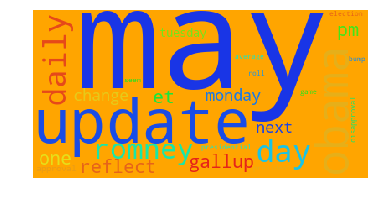

In [52]:
sudo conda install -c conda-forge wordcloud=1.2.1
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

temp_filter = ""
filtered_comments = []
for w in lemmatized:
    temp_filter += str(w)
    temp_filter += ' '
filtered_comments.append(temp_filter)
print(filtered_comments)
filtered_comments_str = ' '.join(filtered_comments) 
sentiment = WordCloud(background_color = 'orange', max_words=100)
sentiment.generate(filtered_comments_str)
#sentiment.generate('Hello, my name is Hanan. Today is a good day. very very wonderfull. Whatever')
plt.figure()
plt.imshow(sentiment)
plt.axis("off")
plt.show()